In [295]:
import scipy as sp
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random

In [296]:
# Importing data analytics related libraries (DataFrame and Visualization)
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style

# Adjusting the size of matplotlib
import matplotlib as mpl
mpl.rc('figure', figsize=(8, 7))
mpl.__version__

# Adjusting the style of matplotlib
style.use('ggplot')

# Magic to tell python notebook we want matplotlib charts included
%matplotlib inline

# importing pulp as an optimization solver
from pulp import *
import re 

In [297]:
max_accounts_to_simulate = 10

credit_card_account_id = []
for i in range(1000,1000+max_accounts_to_simulate ): #range start#, END# +1) 
  credit_card_account_id.append(i)

In [298]:
cc_account_limit = []
for x in credit_card_account_id :
    for y in np.around( np.random.uniform(low = 1, high = 250, size = 1) )*100 :
        cc_account_limit.append ((x,y))

In [299]:
cc_account_spend_percent = []
for x in credit_card_account_id :
    for y in np.around( np.random.uniform(low = 1, high = 100, size = 1) ) :
        cc_account_spend_percent.append ((x,y))

In [300]:
cc_account_interest_rate_pct = []
for x in credit_card_account_id :
    for y in np.around( np.random.uniform(low = 20, high = 30, size = 1) ) :
        cc_account_interest_rate_pct.append ((x,y))

In [301]:
cc_account_prob_of_default = []
for x in credit_card_account_id :
    for y in np.around( np.random.uniform(low = 1, high = 5, size = 1) ) :
        cc_account_prob_of_default.append ((x,y))

In [302]:
cc_account_limit_df = pd.DataFrame(cc_account_limit, columns =("account_id","credit_limit"))
cc_account_spend_percent_df = pd.DataFrame(cc_account_spend_percent, columns =("account_id","spend_percent"))
cc_account_interest_rate_pct_df = pd.DataFrame(cc_account_interest_rate_pct, columns =("account_id","interest_rate_pct"))
cc_account_prob_of_default_df = pd.DataFrame(cc_account_prob_of_default, columns =("account_id","prob_of_default"))


In [303]:
import functools as ft
dfs = [cc_account_limit_df, cc_account_spend_percent_df, cc_account_interest_rate_pct_df , cc_account_prob_of_default_df]
df  = ft.reduce(lambda left, right: pd.merge(left, right, on='account_id'), dfs)

In [304]:
df["revolving_spend"] = ( df["credit_limit"] * df["spend_percent"] ) / 100 # how much of the credit limit is spent 

In [305]:
df["fee_revenue"] =   round (df["revolving_spend"] * 0.01 *12 )  # 1 pct Fee as a percent of revolving spend for 12 months

In [306]:
df["interest_revenue"] = round (( df["revolving_spend"] * df["interest_rate_pct"] ) / ( 100 ))   # Annual interest revenue for revolving spend

In [307]:
df["total_revenue"] = df["fee_revenue"] + df["interest_revenue"] 

In [308]:
df["loss_given_default"] = round (df["revolving_spend"] * df["prob_of_default"] / 100 ) 

In [309]:
df["Net_Profit_Before_Opti"] = df["total_revenue"]-df["loss_given_default"]

In [310]:
df["min_credit_limit"] = df["credit_limit"] # assuming minimum limit is same as current limit
df["max_credit_limit"] = np.where(df["credit_limit"]* 1.2 > 25000, 25000,df["credit_limit"]* 1.2    )# assuming max limit is not more than 20% of current limit andor not more than 25K

In [311]:
df

,account_id,credit_limit,spend_percent,interest_rate_pct,prob_of_default,revolving_spend,fee_revenue,interest_revenue,total_revenue,loss_given_default,Net_Profit_Before_Opti,min_credit_limit,max_credit_limit
0,1000,24700.0,71.0,22.0,3.0,17537.0,2104.0,3858.0,5962.0,526.0,5436.0,24700.0,25000.0
1,1001,22400.0,31.0,27.0,1.0,6944.0,833.0,1875.0,2708.0,69.0,2639.0,22400.0,25000.0
2,1002,7300.0,24.0,23.0,3.0,1752.0,210.0,403.0,613.0,53.0,560.0,7300.0,8760.0
3,1003,7600.0,91.0,21.0,5.0,6916.0,830.0,1452.0,2282.0,346.0,1936.0,7600.0,9120.0
4,1004,14000.0,55.0,23.0,2.0,7700.0,924.0,1771.0,2695.0,154.0,2541.0,14000.0,16800.0
5,1005,13600.0,71.0,26.0,3.0,9656.0,1159.0,2511.0,3670.0,290.0,3380.0,13600.0,16320.0
6,1006,16800.0,56.0,21.0,2.0,9408.0,1129.0,1976.0,3105.0,188.0,2917.0,16800.0,20160.0
7,1007,5600.0,14.0,29.0,4.0,784.0,94.0,227.0,321.0,31.0,290.0,5600.0,6720.0
8,1008,12300.0,33.0,27.0,1.0,4059.0,487.0,1096.0,1583.0,41.0,1542.0,12300.0,14760.0
9,1009,20400.0,69.0,23.0,5.0,14076.0,1689.0,3237.0,4926.0,704.0,4222.0,20400.0,24480.0


array([[<AxesSubplot:title={'center':'account_id'}>,
        <AxesSubplot:title={'center':'credit_limit'}>,
        <AxesSubplot:title={'center':'spend_percent'}>],
       [<AxesSubplot:title={'center':'interest_rate_pct'}>,
        <AxesSubplot:title={'center':'prob_of_default'}>,
        <AxesSubplot:title={'center':'revolving_spend'}>],
       [<AxesSubplot:title={'center':'fee_revenue'}>,
        <AxesSubplot:title={'center':'interest_revenue'}>,
        <AxesSubplot:title={'center':'total_revenue'}>],
       [<AxesSubplot:title={'center':'loss_given_default'}>,
        <AxesSubplot:title={'center':'Net_Profit_Before_Opti'}>,
        <AxesSubplot:title={'center':'min_credit_limit'}>],
       [<AxesSubplot:title={'center':'max_credit_limit'}>,
        <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSu

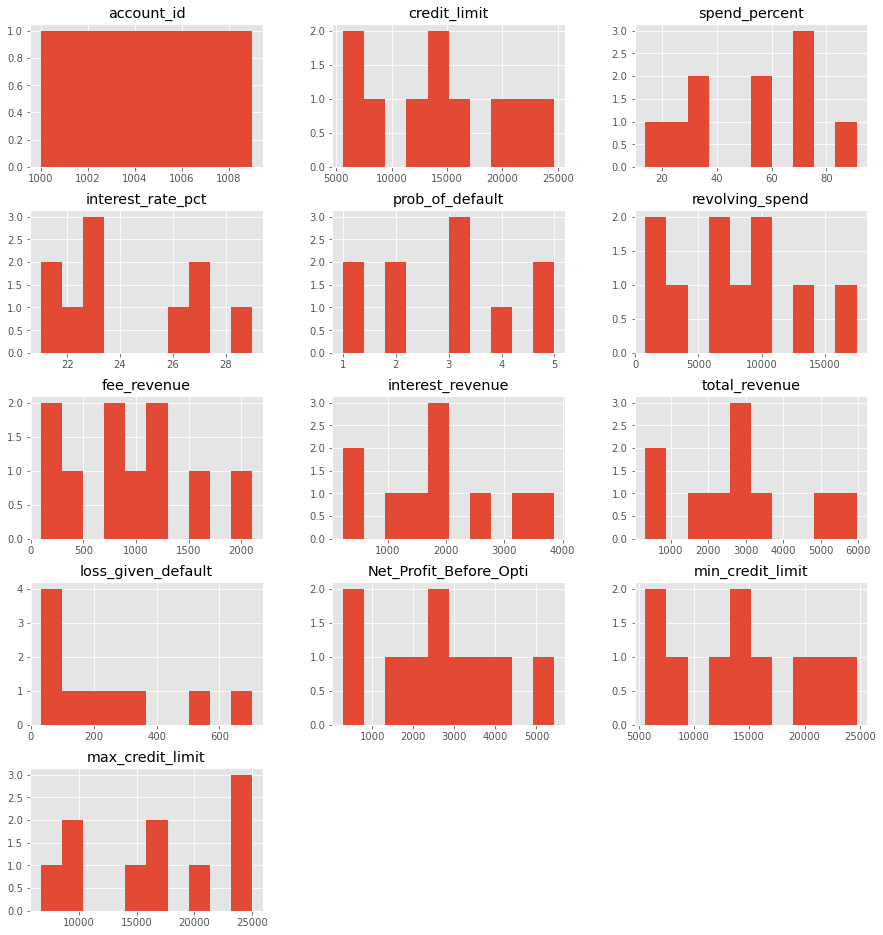

In [312]:
df.hist(figsize=(15,30),layout=(9,3))

In [313]:
#using pulp from here to optimize
#Defining Linear Programming Problem
model = LpProblem('Credit_Card_Portfolio_Optimization', LpMaximize )

In [314]:
lower_bound = []
for rownum, row in df.iterrows():
    lb = row['min_credit_limit'] 
    #lb_val =  (str(lb)) 
    lower_bound.append(lb)  

In [315]:
number_of_var = len(lower_bound) 

In [316]:
upper_bound = []
for rownum, row in df.iterrows():
    ub = row['max_credit_limit'] 
    upper_bound.append(ub)  

In [317]:
decision_variables = [LpVariable(f"x{i}", lowBound=lower_bound[i], upBound=upper_bound[i], cat=LpInteger) for i in range(number_of_var)]

In [328]:
# creating optimization function
# here we are optimizing net gains ( Revenue - loss when default )

net_profit_total = ""
for rownum, row in df.iterrows():
    for i, dv in enumerate(decision_variables):
        if rownum == i:
            net_profit_total += dv * ( row['spend_percent'] / 100 ) * ( 
                              (0.01) * 12  # Annual Fee Revenue as a percent of spend value
                           +  (row['interest_rate_pct'] /( 100  ))  # Annual Interest Revenue
                           -  (row['prob_of_default'] / 100)  # Loss Given Default
                           )   
                    
model += net_profit_total
print ( "Objective function (net_profit_total): "+ str(net_profit_total))

Objective function (net_profit_total): 0.22009999999999993*x0 + 0.1178*x1 + 0.07679999999999998*x2 + 0.25479999999999997*x3 + 0.1815*x4 + 0.24849999999999997*x5 + 0.17359999999999998*x6 + 0.051800000000000006*x7 + 0.1254*x8 + 0.207*x9


C:\Users\skuma\Anaconda3\lib\site-packages\pulp\pulp.py:1704: UserWarning: Overwriting previously set objective.
  warnings.warn("Overwriting previously set objective.")


In [329]:
# Display problems
print (model)
model.writeLP("Credit_Card_Portfolio_Optimization.lp" )

Credit_Card_Portfolio_Optimization:
MAXIMIZE
0.22009999999999993*x0 + 0.1178*x1 + 0.07679999999999998*x2 + 0.25479999999999997*x3 + 0.1815*x4 + 0.24849999999999997*x5 + 0.17359999999999998*x6 + 0.051800000000000006*x7 + 0.1254*x8 + 0.207*x9 + 0.0
VARIABLES
24700 <= x0 <= 25000 Integer
22400 <= x1 <= 25000 Integer
7300 <= x2 <= 8760 Integer
7600 <= x3 <= 9120 Integer
14000 <= x4 <= 16800 Integer
13600 <= x5 <= 16320 Integer
16800 <= x6 <= 20160 Integer
5600 <= x7 <= 6720 Integer
12300 <= x8 <= 14760 Integer
20400 <= x9 <= 24480 Integer



[x0, x1, x2, x3, x4, x5, x6, x7, x8, x9]

In [330]:
#now run optimization
optimization_result = model.solve()
assert optimization_result == LpStatusOptimal
print("Status:", LpStatus[model.status])
Total = df["Net_Profit_Before_Opti"].sum()
print ("Net_Profit_Before_Optimization: $",round (Total , 2))
print("Optimal Solution to the problem: $", round (value(model.objective), 2))
net_profit_total_before_vs_after_optimization = round (value(model.objective) - Total)
print("net_profit_total_before_vs_after_optimization: $", round (net_profit_total_before_vs_after_optimization,2))
print ("Individual decision_variables ( suggested Credit Limits After Optimization:) ")
for v in model.variables():
    print(v.name, "=", v.varValue)

Status: Optimal
Net_Profit_Before_Optimization: $ 25463.0
Optimal Solution to the problem: $ 29314.9
net_profit_total_before_vs_after_optimization: $ 3852
Individual decision_variables ( suggested Credit Limits After Optimization:) 
x0 = 25000.0
x1 = 25000.0
x2 = 8760.0
x3 = 9120.0
x4 = 16800.0
x5 = 16320.0
x6 = 20160.0
x7 = 6720.0
x8 = 14760.0
x9 = 24480.0
